# Redes Neuronales con Fakes News

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cu116.html

Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html


Cargar librerías necesarias

In [ ]:
#Librerías necesarias

import pandas as pd
import numpy as np
import networkx as nx
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
import torch_geometric.data as geom_data
import torch_geometric.nn as geom_nn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Carga del dataset

In [ ]:
# Montar Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive

ruta_archivo = '/content/drive/MyDrive/Profundo/fake_real_news.csv'

df = pd.read_csv(ruta_archivo)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,text,subject,date,target
0,GERMAN RESIDENTS FIGHT BACK: Anti-Islamic Song...,Apparently these Germans are not interested in...,left-news,"Jan 3, 2016",1
1,(VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...,I VE HAD IT!,politics,"Jul 20, 2015",1
2,Greek president tells Turkey's Erdogan no trea...,ATHENS (Reuters) - Greek President Prokopis Pa...,worldnews,"December 7, 2017",0
3,Colbert Scorches Trump’s Anti-Trans Bigotry; ...,"During his campaign, Donald Trump promised tha...",News,"February 24, 2017",1
4,"Pentagon chief, Saudi deputy crown prince disc...",WASHINGTON (Reuters) - U.S. Defense Secretary ...,politicsNews,"March 16, 2017",0
...,...,...,...,...,...
44893,Putin says U.S. hacking scandal not in Russia'...,MOSCOW (Reuters) - The scandal that erupted in...,politicsNews,"October 12, 2016",0
44894,Exclusive: Bangladesh PM says expects no help ...,NEW YORK (Reuters) - Bangladesh Prime Minister...,worldnews,"September 19, 2017",0
44895,Exclusive: Trump administration reduces suppor...,WASHINGTON (Reuters) - The administration of P...,politicsNews,"October 13, 2017",0
44896,Loan Officer Fired From Her Job After Posting...,First Amendment supporting conservatives are...,News,"July 28, 2016",1


Tratamiento de los datos

In [ ]:
# 2. Preprocesamiento de datos
X = df.drop('target', axis=1)
y = df['target'].values

# Identify numerical features (assuming 'id' is a numerical feature)
numerical_features = X.select_dtypes(include=np.number).columns
# If there are other numerical features besides 'id', include them in the list
# Example: numerical_features = ['id', 'other_numerical_feature1', 'other_numerical_feature2']
# If there are no numerical features, consider converting some features to numerical or creating new numerical features

if len(numerical_features) == 0:
    # Handle the case when there are no numerical features
    # This example creates a numerical feature by encoding the 'title' column using pd.factorize
    X['title_encoded'] = pd.factorize(X['title'])[0]  # Encode 'title' to numerical
    numerical_features = ['title_encoded']  # Use the encoded feature for scaling

X_numerical = X[numerical_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)




Redes neuronales con scikit-learn

Accuracy: 0.5641425389755012
              precision    recall  f1-score   support

           0       0.55      0.45      0.49      4241
           1       0.57      0.67      0.62      4739

    accuracy                           0.56      8980
   macro avg       0.56      0.56      0.56      8980
weighted avg       0.56      0.56      0.56      8980



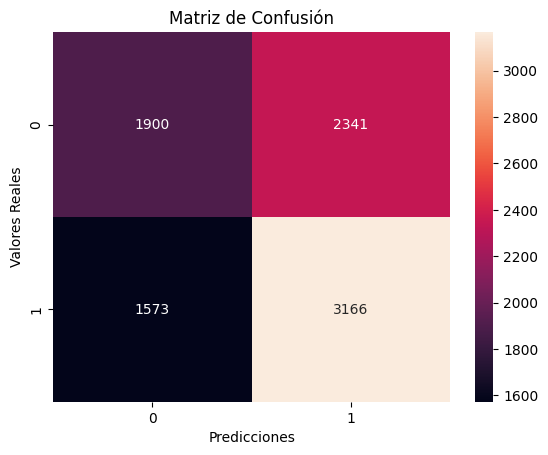

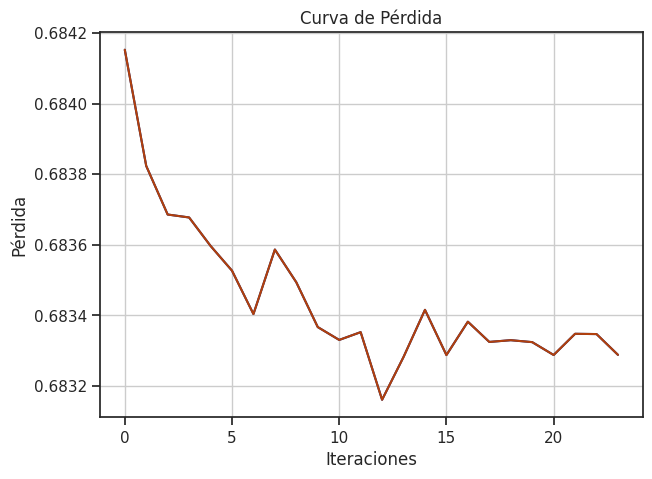

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir y entrenar el modelo de red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
y_test_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

# Curva de convergencia de pérdida de la función (Entrenamiento)
plt.figure(figsize=(7, 5))
sns.set_theme(style="ticks", palette="dark")
sns.lineplot(data=mlp.loss_curve_)
plt.plot(mlp.loss_curve_)
plt.grid(True)
plt.title('Curva de Pérdida')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['adaptive'],
}

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validated score:  {:.2f}".format(grid_search.best_score_))

Best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best cross-validated score:  0.56


Curva ROC de scikit-learn

Test Accuracy (Neural Network): 0.57


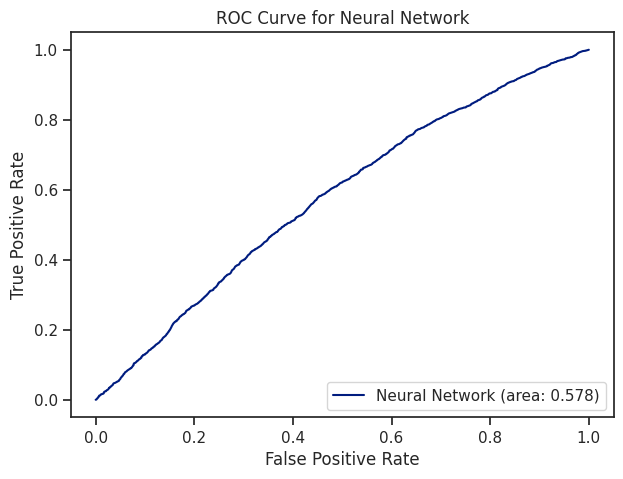

In [ ]:
best_mlp_model = grid_search.best_estimator_

y_test_pred_nn = best_mlp_model.predict(X_test)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
print(f"Test Accuracy (Neural Network): {test_accuracy_nn:.2f}")

y_test_pred_proba_nn = best_mlp_model.predict_proba(X_test)[:, 1]
test_roc_auc_nn = roc_auc_score(y_test, y_test_pred_proba_nn)

fpr_nn, tpr_nn,   _ = roc_curve(y_test, y_test_pred_proba_nn)

plt.figure(figsize=(7, 5))
sns.set_theme(style="ticks", palette="dark")
sns.lineplot(x=fpr_nn, y=tpr_nn, label=f'Neural Network (area: {test_roc_auc_nn:.3f})', errorbar=None)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

Redes neuronales con Keras

Keras version: 3.8.0
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5586 - loss: 0.6851 - val_accuracy: 0.5437 - val_loss: 0.6867
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5625 - loss: 0.6845 - val_accuracy: 0.5514 - val_loss: 0.6866
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5653 - loss: 0.6843 - val_accuracy: 0.5391 - val_loss: 0.6887
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5702 - loss: 0.6820 - val_accuracy: 0.5441 - val_loss: 0.6864
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5634 - loss: 0.6836 - val_accuracy: 0.5444 - val_loss: 0.6867
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5660 - loss: 0.6819 - val_accuracy: 0.5423 - val_loss: 0.6867
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5692 - loss: 0.6821 - val_accuracy: 0.5452 - val_loss: 0.6865
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5669 - loss: 0.6832 - val_accuracy: 0.5427

Text(46.25, 0.5, 'Valores Reales')

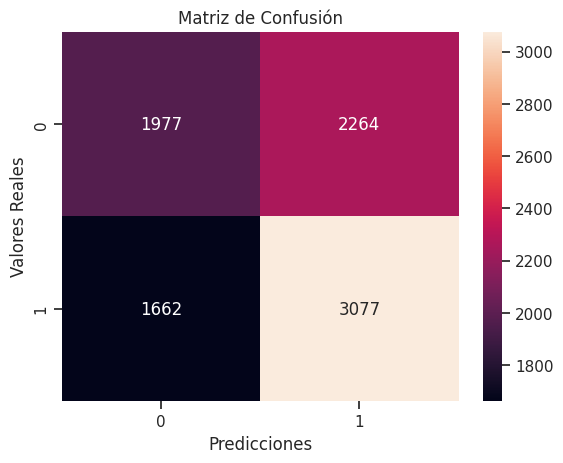

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models
print(f"Keras version: {keras.__version__}")

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Definir el modelo de red neuronal con Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# 5. Predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Informe de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')

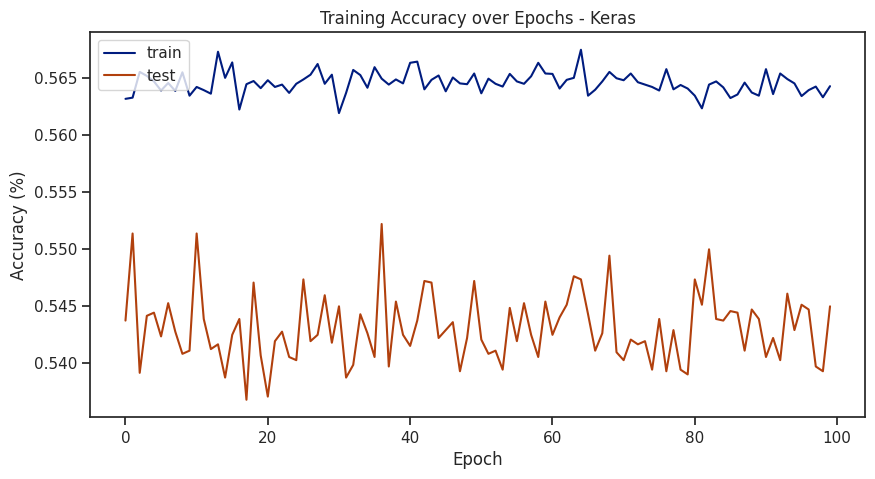

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy over Epochs - Keras')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


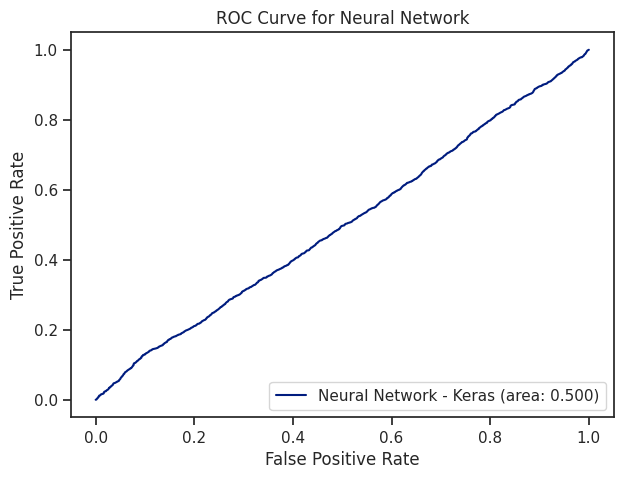

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
mlp_keras = models.Sequential([
  layers.Dense(10, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

mlp_keras.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error",
    metrics=["accuracy"]
)

y_test_pred_nn_keras = mlp_keras.predict(X_test)

test_roc_auc_nn_keras = roc_auc_score(y_test, y_test_pred_nn_keras)
#fpr, tpr, _ = roc_curve(y_test, y_test_pred_nn_keras) #fpr and tpr are defined here

#fpr_nn, tpr_nn,   _ = roc_curve(y_test, y_test_pred_proba_nn) # This line is not present in the code

# defining fpr and tpr with fpr_nn and tpr_nn respectively.
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_pred_nn_keras)

#Curva ROC en Keras
plt.figure(figsize=(7, 5))
sns.set_theme(style="ticks", palette="dark")
sns.lineplot(x=fpr_nn, y=tpr_nn, label=f'Neural Network - Keras (area: {test_roc_auc_nn_keras:.3f})', errorbar=None)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

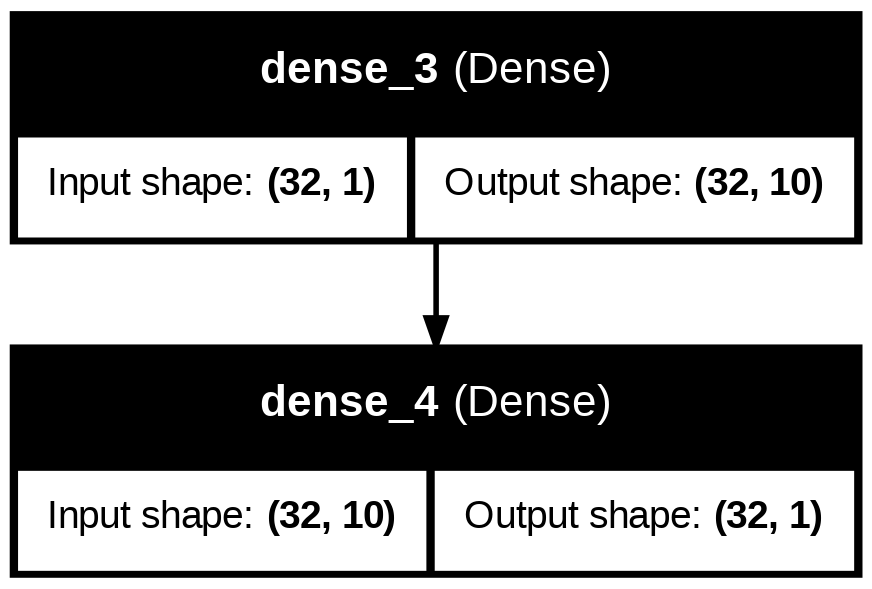

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(mlp_keras, to_file='mlp_keras_model.png', show_shapes=True, show_layer_names=True)


Redes neuronales con Pytorch

Epoch [10/100], Loss: 0.6868
Epoch [20/100], Loss: 0.6846
Epoch [30/100], Loss: 0.6841
Epoch [40/100], Loss: 0.6840
Epoch [50/100], Loss: 0.6838
Epoch [60/100], Loss: 0.6839
Epoch [70/100], Loss: 0.6838
Epoch [80/100], Loss: 0.6837
Epoch [90/100], Loss: 0.6835
Epoch [100/100], Loss: 0.6835
Accuracy: 0.5631
              precision    recall  f1-score   support

         0.0       0.55      0.44      0.49      4241
         1.0       0.57      0.67      0.62      4739

    accuracy                           0.56      8980
   macro avg       0.56      0.56      0.55      8980
weighted avg       0.56      0.56      0.56      8980



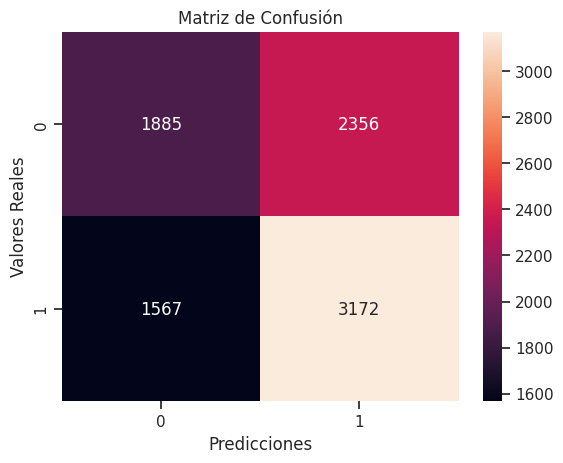

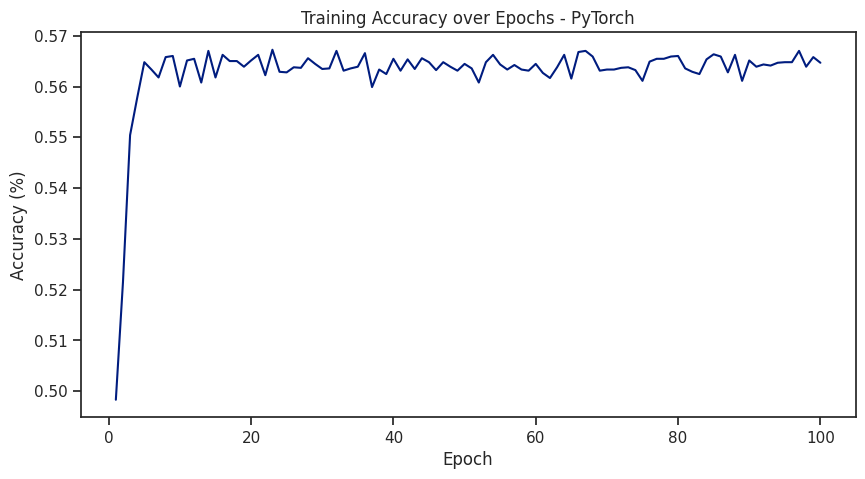

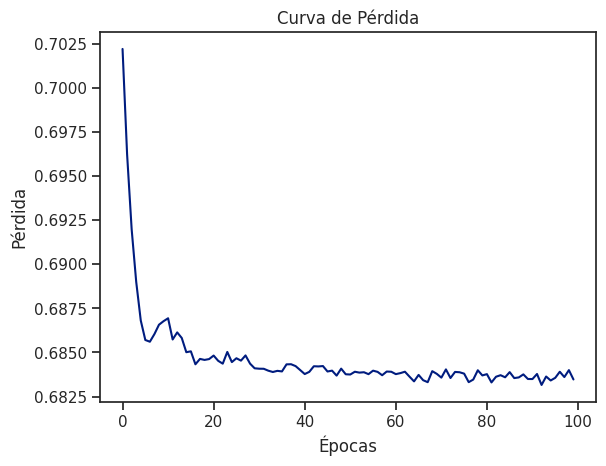

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 3. Definir el modelo de red neuronal con PyTorch
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

model = NeuralNetwork(X_train.shape[1])

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Entrenar el modelo
epochs = 100
losses = []
accuracy_list = [] # Initialize accuracy_list to store accuracy values for each epoch

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    # Calculate and store accuracy for the current epoch
    with torch.no_grad():
        y_pred_prob = model(X_test)
        y_pred = (y_pred_prob > 0.5).float().numpy()
        accuracy = accuracy_score(y_test.numpy(), y_pred)
        accuracy_list.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 5. Realizar predicciones en el conjunto de prueba
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob > 0.5).float().numpy()

# 6. Evaluar el modelo
y_test_np = y_test.numpy()
accuracy = accuracy_score(y_test_np, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Informe de clasificación
print(classification_report(y_test_np, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

#Evolucion del entrenamiento por Epochs-PyTorch
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), accuracy_list) # Use 'epochs' instead of 'num_epochs'
plt.title('Training Accuracy over Epochs - PyTorch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()


# Curva de pérdida
plt.plot(losses)
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()